# Foursquare Project

## Introduction: Business problem

Nowadays coffee is one of the essential drinks in a day for students, elders and people who work in a office. They see in this product a way to gain energy for the daily routine and stop the sleeping feeling. In Auckland the best places to share a conversation or working reunions are in a coffee shop. So if you have a really nice coffee place that is near a Universities, offices and theaters, you might have a successful place. In this case, if you want to start a new coffee place in Auckland one thing you need to find a sector that is not to far away from that places which accumulates a lot of persons, also in this sector you need the fewer amount of coffees because this is a a way to make the difference with your competitors.

## Data

For that reason, we are extracting the location data of Foursquare. In this case we are only getting the latitude and the longitude of the coffee places existing in this social media and using the folium map we can see some of the interesting places such as libraries, theaters, parks, cinemas and others, that gives a good idea where can be an excellent place to locate a new coffee.

In [1]:
#libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values  
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library

In [2]:
# Credentials
CLIENT_ID = 'OAT2O4AVCTI12OZM0S1UHY2EC2EJOYCXF325MXMBYNXPDQ4H' # your Foursquare ID
CLIENT_SECRET = '5BDSES0XTPQSDUJ2O4UOEOAPAFZ0X13AMIE24C0KDC40XIXK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OAT2O4AVCTI12OZM0S1UHY2EC2EJOYCXF325MXMBYNXPDQ4H
CLIENT_SECRET:5BDSES0XTPQSDUJ2O4UOEOAPAFZ0X13AMIE24C0KDC40XIXK


In [3]:
# Address
address = 'Auckland, New Zealand'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

-36.852095 174.7631803


In [4]:
# Search variables 
search_query = 'coffee'
radius = 500
print(search_query + ' .... OK!')

coffee .... OK!


In [6]:
#url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=OAT2O4AVCTI12OZM0S1UHY2EC2EJOYCXF325MXMBYNXPDQ4H&client_secret=5BDSES0XTPQSDUJ2O4UOEOAPAFZ0X13AMIE24C0KDC40XIXK&ll=-36.852095,174.7631803&v=20180604&query=coffee&radius=500&limit=100'

In [7]:
#data extraction
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e7d7a3547b43d0023c64713'},
 'response': {'venues': [{'id': '4bf48396cad2c92878109c99',
    'name': 'Esquires Coffee House',
    'location': {'address': 'Cnr Hobson St & Victoria St West',
     'lat': -36.84789205149076,
     'lng': 174.76160577961915,
     'labeledLatLngs': [{'label': 'display',
       'lat': -36.84789205149076,
       'lng': 174.76160577961915}],
     'distance': 488,
     'postalCode': '1010',
     'cc': 'NZ',
     'city': 'Auckland',
     'state': 'Auckland',
     'country': 'New Zealand',
     'formattedAddress': ['Cnr Hobson St & Victoria St West',
      'Central Business District 1010',
      'New Zealand']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1585281560',


In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4bf48396cad2c92878109c99,Esquires Coffee House,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1585281560,False,Cnr Hobson St & Victoria St West,-36.847892,174.761606,"[{'label': 'display', 'lat': -36.8478920514907...",488,1010,NZ,Auckland,Auckland,New Zealand,"[Cnr Hobson St & Victoria St West, Central Bus...",NaN,NaN
1,4dfab10262e19b42f1e21194,Q Coffee,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1585281560,False,NaN,-36.850973,174.764209,"[{'label': 'display', 'lat': -36.8509730865442...",154,NaN,NZ,Auckland,Auckland,New Zealand,"[Auckland, New Zealand]",NaN,NaN
2,53b20ab1498ed1411b9f7aec,The Coffee Club,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1585281560,False,NaN,-36.852068,174.763210,"[{'label': 'display', 'lat': -36.8520676510964...",4,NaN,NZ,Auckland,Auckland,New Zealand,"[Auckland, New Zealand]",NaN,NaN
3,4c1a86098b3aa59330c0955f,C-Pod Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1585281560,False,31 Airedale St.,-36.854139,174.764276,"[{'label': 'display', 'lat': -36.8541388961588...",247,NaN,NZ,Auckland,Auckland,New Zealand,"[31 Airedale St., Auckland, New Zealand]",NaN,NaN
4,4df97b53d4c064db03a967e1,Atomic Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1585281560,False,438 Queen St.,-36.854206,174.764010,"[{'label': 'display', 'lat': -36.8542063490610...",246,1010,NZ,Auckland,Auckland,New Zealand,"[438 Queen St., Auckland 1010, New Zealand]",NaN,NaN


## Methodology

The main object of this project is to understand where are the areas with more number of coffee places on Auckland, make cluster with them to see which area is the perfect one to open a new coffee. So, to understand the data that we have and understanding our business problem, we need on the first step is plotting a map of Auckland with the coffee places founded on Foursquare. Also we need a special map to see the specific places such as libraries, cinemas and others. 

One important aspect to have present, is the main street of Auckland is the Queen's street. In this street there are the most representative branch and it is perfect to people to find their places to eat or to go shooping.



In [29]:
print(dataframe['name'].value_counts())
print('...................................')
print('total branches: {}'.format(dataframe['name'].nunique()))

Esquires Coffee House      6
Gloria Jean's Coffee       4
The Coffee Club            4
Coffee Right               2
Columbus Coffee            2
Gloria Jean's Coffees      2
Allpress Coffee            1
Relax Coffee Lounge        1
Orb Coffee                 1
Sierra                     1
gloria jean's coffee       1
Bespoke Coffee             1
Coffee Theory              1
Sierra Coffee              1
Coffee La Vie              1
Atomic Coffee              1
Bruno Rossi Coffee Cart    1
Coffee Strength            1
The Coffee Guy @ TRN       1
iCoffee                    1
Little Albert Coffee       1
C-Pod Coffee               1
ME Coffee Boutique         1
Coffee  Bari               1
Remedy Coffee              1
French Coffee              1
Fresh Pots.                1
Zee Coffee                 1
Johnny Wrays Coffee        1
Spill TB Espresso          1
Organic Coffee             1
Q Coffee                   1
Coffeezoo                  1
Esquires Coffee            1
Zephyr Coffee 

In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
id                           50 non-null object
name                         50 non-null object
categories                   50 non-null object
referralId                   50 non-null object
hasPerk                      50 non-null bool
location.address             34 non-null object
location.lat                 50 non-null float64
location.lng                 50 non-null float64
location.labeledLatLngs      50 non-null object
location.distance            50 non-null int64
location.postalCode          23 non-null object
location.cc                  50 non-null object
location.city                42 non-null object
location.state               42 non-null object
location.country             50 non-null object
location.formattedAddress    50 non-null object
location.crossStreet         11 non-null object
venuePage.id                 1 non-null object
Cluster Labels               50 non

In [31]:
map_auckland = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dataframe['location.lat'], dataframe['location.lng'], dataframe['location.state'], dataframe['name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_auckland)  
    
map_auckland

Above we have our exploratory data. This shows us that we have in total 50 coffee places and there are 36 branches in our dataframe. Another important fact that we can see is that there are 30 coffee places that only have one branch and this may give us an idea that is a good business to start because there are not a main or a couple of branches that manage this sector

Additionally, we can see in the map that our coffees are all near to common places like libraries, universities and others, that is one of the characteristics that we were looking. 

For this problem we are seeing where are the places or the zone with more number of coffee places, so we decided that the best model to perform this is a KMeans. This model permit use make clusters of the places that near between them and that give us the perfect idea where are the best zones to start our coffee. Also, this model permit us to give them the latitude and longitude to calculate the distance between each point of our dataset and that makes it accurate for the type of problem that we have.

The first thing that we are doing is to perform an elbow score, to determine what is the best K for our model. Next, we perform the KMeans model with the K that best fit to our data and finally we see our result in the map.

### KMeans model

In [10]:
# ML libraries
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [11]:
model=KMeans()

In [12]:
# See the best K for KMeans
visualizer = KElbowVisualizer(model,k=(1,12))

In [13]:
X=dataframe[['location.lat','location.lng']]

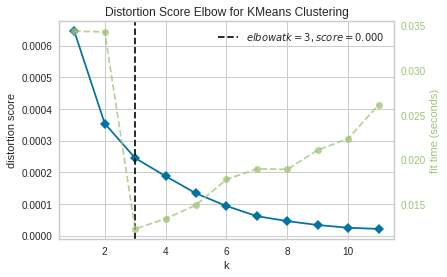

In [14]:
visualizer.fit(X)
visualizer.show()

In [15]:
# total number of cluster
kclusters = 3
# KMeans model
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)
#labels
kmeans.labels_

array([0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 0], dtype=int32)

In [16]:
dataframe['Cluster Labels']=kmeans.labels_

In [17]:
#Visualization libraries
import matplotlib.cm as cm
import matplotlib.colors as colors

In [32]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe['location.lat'], dataframe['location.lng'], dataframe['name'], dataframe['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
dataframe['Cluster Labels'].value_counts()

0    23
2    14
1    13
Name: Cluster Labels, dtype: int64

## Results

The elbow score show us that the best K is 3 and if we see in the graph after 3 the score goes down really fast. So that makes us identify the best K for this problem is 3. 

On the map we can see that the 3 main areas that the model detected are south,east and west. For that reason it give us an idea that on the north there are no coffee so it could be one zone to build the business. But there is another thing to think why are not coffee places there. 

One reason that we can see and make stronger the hypothesis that this place has to be near specific places is that on the north there are not cinemas, universities or libraries that help to get more people around. 

We can see that the 0 cluster (west) is the biggest cluster with 23 coffee places, so that is not the zone that we are searching for. The other two cluster have 14 and 13 places, so they are good places to locate a coffee place. The zone of cluster 1 (east) there is a perfect spot in front of the Albert park, that square shows no coffee places so it could be perfect to start our business there, also this zone is near to the university and this is what are we looking at. On the other hand, we have an alone spot on the south west, that is shown for the cluster 2 (south) that spot is near to aoeta centre station and various theaters so thats another place to build the coffee place. 

## Conclusion

The main problem here is to find a perfect place to start a new coffee place in Auckland, for that there are two main ideas that fits to the problem. First one is that the place have to be a good zone, shows for the number of coffee near the zone and the second one is that this place has to be near a specific places like libraries, universities, cinemas and others. To understand where are the zones with more number of coffee places, we decided to use a KMeans model that help us to make groups of the points that near. In this case, we find 3 cluster are the best to fit the KMeans model. Finally with the result of the model and the map we can decide which zone is the best and the result shows two main zone. The best zone to choose is the one one the south west and there are two main ideas that gives us to decided that. The first one, is that the west zone shows us that is good for coffee places, for the reason they have 30 places and the second one, is the zone with more theaters and cinemas near, also there is a bus station so that shows that to many persons have to pass there. 